In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
kbank = yf.Ticker('BTC-USD')
data = kbank.history(interval='1d', start='2020-01-01', end='2022-12-01')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-01 00:00:00+00:00,7194.892090,7254.330566,7174.944336,7200.174316,18565664997,0.0,0.0
2020-01-02 00:00:00+00:00,7202.551270,7212.155273,6935.270020,6985.470215,20802083465,0.0,0.0
2020-01-03 00:00:00+00:00,6984.428711,7413.715332,6914.996094,7344.884277,28111481032,0.0,0.0
2020-01-04 00:00:00+00:00,7345.375488,7427.385742,7309.514160,7410.656738,18444271275,0.0,0.0
2020-01-05 00:00:00+00:00,7410.451660,7544.497070,7400.535645,7411.317383,19725074095,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-26 00:00:00+00:00,16521.576172,16666.863281,16416.228516,16464.281250,18000008764,0.0,0.0
2022-11-27 00:00:00+00:00,16463.882812,16594.406250,16437.025391,16444.626953,20443898509,0.0,0.0
2022-11-28 00:00:00+00:00,16440.222656,16482.933594,16054.530273,16217.322266,27743025156,0.0,0.0


In [8]:
# data.to_csv("stock_data.csv")

In [9]:
df =pd.read_csv('stock_data.csv')
df1=df.reset_index()['Close']
df1

0      140.309647
1      139.395569
2      131.168945
3      130.711899
4      127.969704
          ...    
700    143.500000
701    143.500000
702    143.500000
703    145.500000
704    144.500000
Name: Close, Length: 705, dtype: float64

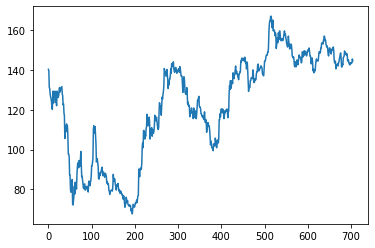

In [10]:
plt.plot(df1)